In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path, PureWindowsPath
import os
from skimage import measure
from scipy import stats
import pandas as pd


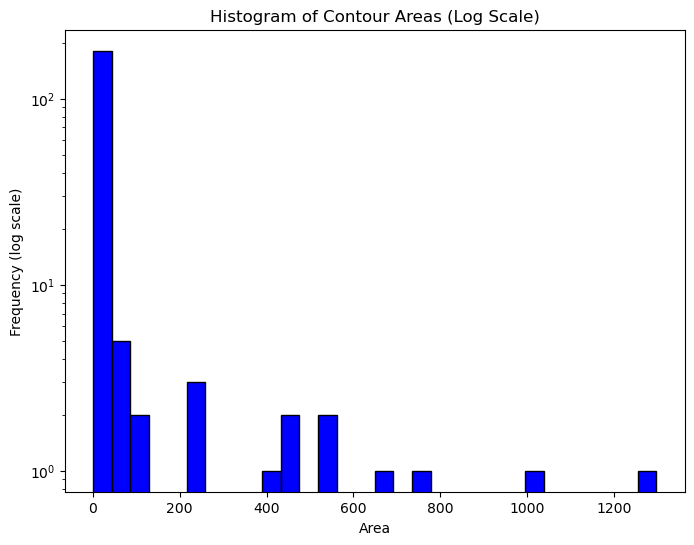

Min contour area: 0.0
Max contour area: 1297.5
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 5.5, 6.0, 6.5, 8.0, 41.0, 43.0, 54.0, 74.5, 77.5, 79.0,

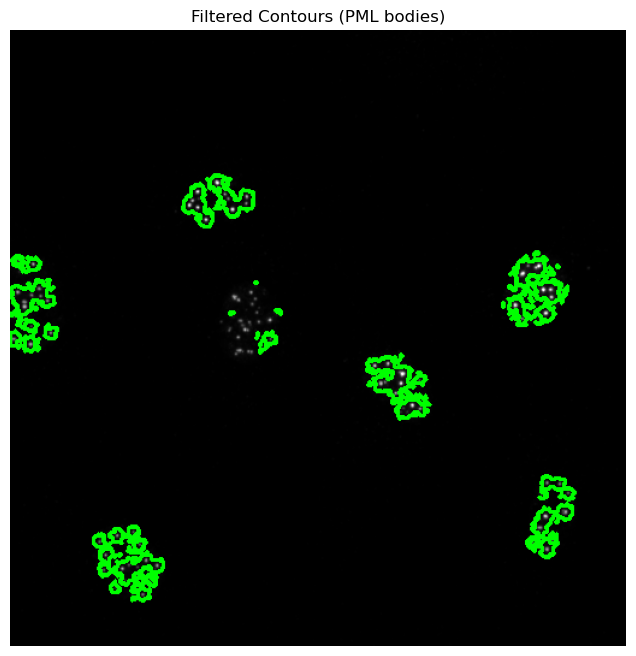

Number of PML bodies (white-circled): 42


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots are displayed in the notebook
%matplotlib inline

# Load the image
image = cv2.imread('/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged-pml-images-No-arsenic/flattened_position_1_C1.tif')
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 
                                        11, 2)

# Find contours
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate areas of all contours
areas = [cv2.contourArea(contour) for contour in contours]

# Plot histogram of contour areas in the notebook
# Plot histogram of contour areas with a log scale for the y-axis
plt.figure(figsize=(8,6))
plt.hist(areas, bins=30, color='blue', edgecolor='black')
plt.yscale('log')  # Set the y-axis to log scale
plt.title('Histogram of Contour Areas (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Frequency (log scale)')
plt.show()
# plt.figure(figsize=(8,6))
# plt.hist(areas, bins=30, color='blue', edgecolor='black')
# plt.title('Histogram of Contour Areas')
# plt.xlabel('Area')
# plt.ylabel('Frequency')
# plt.show()

# Print the minimum and maximum area values for inspection
print(f"Min contour area: {min(areas)}")
print(f"Max contour area: {max(areas)}")

# Optional: print some specific areas to understand the range
print(f"Sorted contour areas: {sorted(areas)}")

# Manually adjust based on observation
min_area = 1   # Set after observing the histogram
max_area = 1000 # Set after observing the histogram

# Filter contours based on the area threshold
valid_contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

# Instead of displaying via OpenCV, display the filtered contours using matplotlib
result_image = image.copy()
cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)

# Convert the BGR OpenCV image to RGB for displaying in matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Plot the filtered contour image in the notebook


plt.figure(figsize=(8,8))
plt.imshow(result_image_rgb)
plt.title('Filtered Contours (PML bodies)')
plt.axis('off')
plt.show()

# Count the number of valid PML bodies (white-circled)
num_pml_bodies = len(valid_contours)
print(f'Number of PML bodies (white-circled): {num_pml_bodies}')

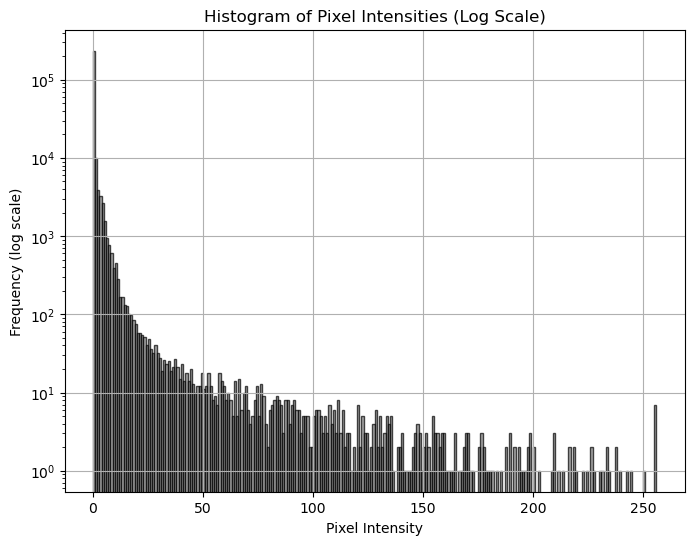

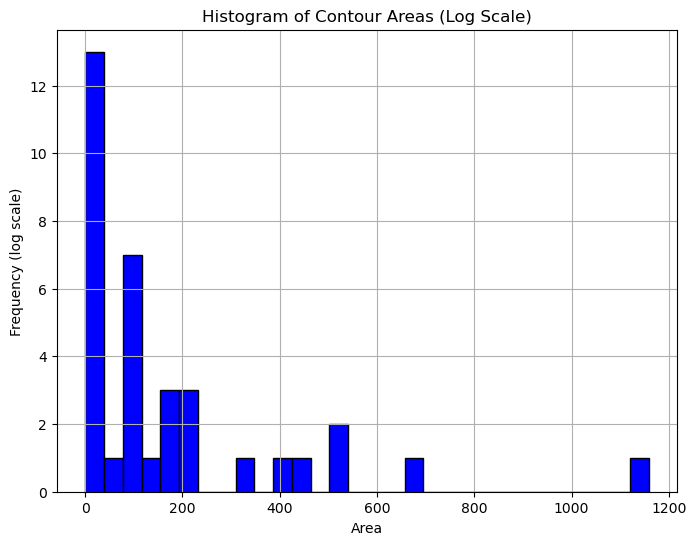

Min contour area: 0.0
Max contour area: 1159.0
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.5, 75.0, 80.0, 80.0, 86.0, 86.0, 100.0, 107.5, 113.0, 120.0, 164.0, 185.0, 192.5, 220.0, 222.5, 227.0, 339.5, 400.5, 444.0, 536.5, 540.0, 690.0, 1159.0]


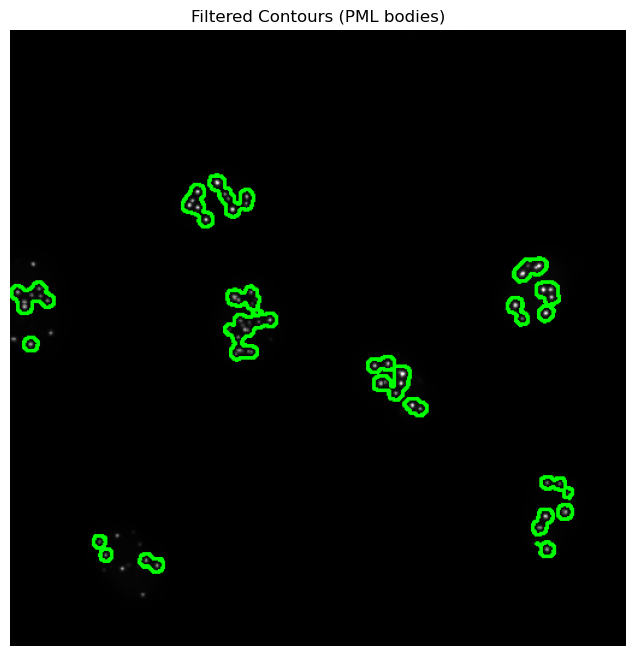

Number of PML bodies (white-circled): 16


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots are displayed in the notebook
# Uncomment the following line if running in a Jupyter Notebook
# %matplotlib inline

# Load the image
image = cv2.imread('./data/image.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot histogram of pixel intensities with log scale for y-axis
plt.figure(figsize=(8, 6))
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7, edgecolor='black')
plt.yscale('log')  # Set the y-axis to log scale
plt.title('Histogram of Pixel Intensities (Log Scale)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (log scale)')
plt.grid()
plt.show()

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 
                                        11, 2)

# Find contours
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate areas of all contours
areas = [cv2.contourArea(contour) for contour in contours]

# Plot histogram of contour areas in the notebook
plt.figure(figsize=(8, 6))
plt.hist(areas, bins=30, color='blue', edgecolor='black')
# plt.yscale('log')  # Set the y-axis to log scale
plt.title('Histogram of Contour Areas (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Frequency (log scale)')
plt.grid()
plt.show()

# Print the minimum and maximum area values for inspection
print(f"Min contour area: {min(areas)}")
print(f"Max contour area: {max(areas)}")

# Optional: print some specific areas to understand the range
print(f"Sorted contour areas: {sorted(areas)}")

# Manually adjust based on observation
min_area = 100   # Set after observing the histogram
max_area = 1200  # Set after observing the histogram

# Filter contours based on the area threshold
valid_contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

# Instead of displaying via OpenCV, display the filtered contours using matplotlib
result_image = image.copy()
cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)

# Convert the BGR OpenCV image to RGB for displaying in matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Plot the filtered contour image in the notebook
plt.figure(figsize=(8, 8))
plt.imshow(result_image_rgb)
plt.title('Filtered Contours (PML bodies)')
plt.axis('off')
plt.show()

# Count the number of valid PML bodies (white-circled)
num_pml_bodies = len(valid_contours)
print(f'Number of PML bodies (white-circled): {num_pml_bodies}')


In [20]:
def analyze_pml_bodies(input_folder, output_folder, threshold_method='otsu'):
    """
    Analyze PML bodies in merged images from SharePoint folder.
    
    Parameters:
    -----------
    sharepoint_input_folder : str
        SharePoint path to folder containing merged images
    sharepoint_output_folder : str
        SharePoint path to save analysis results
    threshold_method : str
        'otsu' or 'adaptive' for different thresholding approaches
    """

    
    # Create output folders
    output_folder = Path(output_folder)
    plots_folder = output_folder / "plots"
    stats_folder = output_folder / "statistics"
    
    for folder in [output_folder, plots_folder, stats_folder]:
        folder.mkdir(parents=True, exist_ok=True)
        print(f"Created folder: {folder}")
    
    # Get all images
    try:
        images = [f for f in os.listdir(input_folder) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.tif', '.tiff', '.png'))]
        print(f"Found {len(images)} images in input folder")
    except Exception as e:
        raise Exception(f"Error accessing input folder: {str(e)}")
    
    if not images:
        raise ValueError(f"No images found in {input_folder}")
    
    # Initialize lists to store overall statistics
    all_areas = []
    all_intensities = []
    all_circularity = []
    
    # Process each image
    for img_name in images:
        print(f"\nProcessing {img_name}")
        img_path = os.path.join(input_folder, img_name)
        
        try:
            # Read image
            image = cv.imread(img_path)
            if image is None:
                print(f"Warning: Could not read {img_path}")
                continue
                
            # Convert to grayscale if not already
            if len(image.shape) == 3:
                gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            else:
                gray = image
            
            print(f"Image shape: {image.shape}, Intensity range: [{gray.min()}, {gray.max()}]")
            
            # Create histogram of pixel intensities
            plt.figure(figsize=(10, 6))
            hist = plt.hist(gray.ravel(), bins=256, range=(0,256), density=True)
            plt.title(f'Pixel Intensity Distribution - {img_name}')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            plt.savefig(str(plots_folder / f'{img_name}_intensity_hist.png'))
            plt.close()
            
            # Threshold image
            if threshold_method == 'otsu':
                thresh, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
                print(f"Otsu threshold value: {thresh}")
            else:
                binary = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv.THRESH_BINARY, 11, 2)
            
            # Save binary image for verification
            cv.imwrite(str(plots_folder / f'{img_name}_binary.png'), binary)
            
            # Label connected components
            labels = measure.label(binary)
            props = measure.regionprops(labels, gray)
            print(f"Found {len(props)} potential PML bodies")
            
            if len(props) == 0:
                print("Warning: No objects detected. Adjusting threshold might be needed.")
                continue
            
            # Extract properties
            areas = [prop.area for prop in props]
            intensities = [prop.mean_intensity for prop in props]
            perimeters = [prop.perimeter for prop in props]
            circularity = [4 * np.pi * prop.area / (prop.perimeter ** 2) if prop.perimeter > 0 else 0 
                          for prop in props]
            
            # Store for overall statistics
            all_areas.extend(areas)
            all_intensities.extend(intensities)
            all_circularity.extend(circularity)
            
            # Create visualization of detected objects
            labeled_img = image.copy()
            for prop in props:
                y, x = prop.centroid
                cv.circle(labeled_img, (int(x), int(y)), 3, (0, 255, 0), -1)
            cv.imwrite(str(plots_folder / f'{img_name}_detected.png'), labeled_img)
            
            # Create plots for this image
            fig, axes = plt.subplots(2, 2, figsize=(15, 15))
            fig.suptitle(f'PML Body Analysis - {img_name}')
            
            axes[0,0].hist(areas, bins=50)
            axes[0,0].set_title(f'Area Distribution (n={len(areas)})')
            axes[0,0].set_xlabel('Area (pixels)')
            axes[0,0].set_ylabel('Frequency')
            
            axes[0,1].hist(intensities, bins=50)
            axes[0,1].set_title('Mean Intensity Distribution')
            axes[0,1].set_xlabel('Mean Intensity')
            axes[0,1].set_ylabel('Frequency')
            
            axes[1,0].hist(circularity, bins=50)
            axes[1,0].set_title('Circularity Distribution')
            axes[1,0].set_xlabel('Circularity')
            axes[1,0].set_ylabel('Frequency')
            
            axes[1,1].scatter(areas, intensities, alpha=0.5)
            axes[1,1].set_title('Area vs Intensity')
            axes[1,1].set_xlabel('Area')
            axes[1,1].set_ylabel('Mean Intensity')
            
            plt.tight_layout()
            plt.savefig(str(plots_folder / f'{img_name}_analysis.png'))
            plt.close()
            
            # Save statistics for this image
            stats_df = pd.DataFrame({
                'Area': areas,
                'Mean_Intensity': intensities,
                'Circularity': circularity,
                'Perimeter': perimeters
            })
            
            stats_df.to_csv(str(stats_folder / f'{img_name}_stats.csv'))
            
            # Calculate and save summary statistics
            summary_stats = {
                'Image_Name': img_name,
                'Total_Objects': len(areas),
                'Mean_Area': np.mean(areas),
                'Std_Area': np.std(areas),
                'Mean_Intensity': np.mean(intensities),
                'Std_Intensity': np.std(intensities),
                'Mean_Circularity': np.mean(circularity),
                'Std_Circularity': np.std(circularity)
            }
            
            pd.DataFrame([summary_stats]).to_csv(
                str(stats_folder / f'{img_name}_summary.csv'))
            
        except Exception as e:
            print(f"Error processing {img_name}: {str(e)}")
            continue
    
    # Save overall analysis
    try:
        if all_areas:  # Only if we have data
            overall_stats = pd.DataFrame({
                'Area': all_areas,
                'Intensity': all_intensities,
                'Circularity': all_circularity
            })
            overall_stats.to_csv(str(stats_folder / 'overall_stats.csv'))
            
            # Create overall distribution plots
            plt.figure(figsize=(15, 5))
            plt.subplot(131)
            plt.hist(all_areas, bins=50)
            plt.title(f'Overall Area Distribution (n={len(all_areas)})')
            plt.xlabel('Area')
            
            plt.subplot(132)
            plt.hist(all_intensities, bins=50)
            plt.title('Overall Intensity Distribution')
            plt.xlabel('Intensity')
            
            plt.subplot(133)
            plt.hist(all_circularity, bins=50)
            plt.title('Overall Circularity Distribution')
            plt.xlabel('Circularity')
            
            plt.tight_layout()
            plt.savefig(str(plots_folder / 'overall_distribution.png'))
            plt.close()
    except Exception as e:
        print(f"Error creating overall analysis: {str(e)}")


In [21]:
# Example usage
if __name__ == "__main__":
    # Replace these with your SharePoint paths
    input_folder = "/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged-pml-images-No-arsenic"
    output_folder = "/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/PML no arsenic image details"
    try:
        analyze_pml_bodies(input_folder, output_folder)
        print("\nAnalysis complete!")
    except Exception as e:
        print(f"Error: {str(e)}")

Created folder: /Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/PML no arsenic image details
Created folder: /Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/PML no arsenic image details/plots
Created folder: /Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/PML no arsenic image details/statistics
Found 120 images in input folder

Processing flattened_position_19_C1_depth_map.tif
Image shape: (512, 512, 3), Intensity range: [15, 223]
Otsu threshold value: 102.0
Found 3444 potential PML bodies

Processing flattened_position_10_C1_enhanced.tif
Image shape: (512, 512, 3), Intensity range: [3, 255]
Otsu threshold value: 46.0
Found 131 potential PML bodies

Processing flattened_position_3-1_C1_enhanced.tif
Image shape: (512, 512


Processing flattened_position_4-1_C1_enhanced.tif
Image shape: (512, 512, 3), Intensity range: [3, 255]
Otsu threshold value: 44.0
Found 140 potential PML bodies

Processing flattened_position_11_C1_enhanced.tif
Image shape: (512, 512, 3), Intensity range: [3, 255]
Otsu threshold value: 45.0
Found 153 potential PML bodies

Processing flattened_position_2-1_C1_depth_map.tif
Image shape: (512, 512, 3), Intensity range: [15, 223]
Otsu threshold value: 119.0
Found 2309 potential PML bodies

Processing flattened_position_17_C1_depth_map.tif
Image shape: (512, 512, 3), Intensity range: [15, 223]
Otsu threshold value: 102.0
Found 1789 potential PML bodies

Processing flattened_position_18-1_C1_enhanced.tif
Image shape: (512, 512, 3), Intensity range: [3, 255]
Otsu threshold value: 46.0
Found 114 potential PML bodies

Processing flattened_position_11-1_C1_depth_map.tif
Image shape: (512, 512, 3), Intensity range: [15, 223]
Otsu threshold value: 119.0
Found 796 potential PML bodies

Processing


Processing flattened_position_13-1_C1_enhanced.tif
Image shape: (512, 512, 3), Intensity range: [3, 255]
Otsu threshold value: 41.0
Found 149 potential PML bodies

Processing flattened_position_3_C1.tif
Image shape: (512, 512, 3), Intensity range: [0, 255]
Otsu threshold value: 61.0
Found 80 potential PML bodies

Processing flattened_position_10-1_C1.tif
Image shape: (512, 512, 3), Intensity range: [0, 255]
Otsu threshold value: 44.0
Found 117 potential PML bodies

Processing flattened_position_19_C1.tif
Image shape: (512, 512, 3), Intensity range: [0, 255]
Otsu threshold value: 45.0
Found 111 potential PML bodies

Processing flattened_position_11-1_C1.tif
Image shape: (512, 512, 3), Intensity range: [0, 255]
Otsu threshold value: 51.0
Found 74 potential PML bodies

Processing flattened_position_8-1_C1.tif
Image shape: (512, 512, 3), Intensity range: [0, 254]
Otsu threshold value: 58.0
Found 76 potential PML bodies

Processing flattened_position_9-1_C1.tif
Image shape: (512, 512, 3), 